---
# Cleaning Data with Pandas
---
Cleaning data is a huge topic. Some people claim that data scientists spend 80% of their time just cleaning their data. The topics that we will cover here are 

* handling missing values
* removing duplicates
* structuring data
* removing outliers
* finding the right data types

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/philipp/conda/envs/scientific_programming/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Missing values

A sentinel value is used to represent missing values for numbers. A special combinations of bits represents "Not a number" (NaN). This can be thought of as the numeric equivalent of `None`. In Python `NaN` is available through the `NumPy` and `Pandas` packages. Since Pandas version 1.0, missing values are represented using a special object: `pd.NA`.

This might seems strange at first, but starts to make sense when we think about the semantics of `NaN` or more generally `NA` as a placeholder for a value that is __N__ot **A**vailable. As `NA` just represents any value that we do not know, it would be wrong to say that a value that we do not know equals another value that we do not know. Therefore `NA` can not really equal anything.

To explicitly test for `NA` we need a separate function, that is provided by `pandas`.

In [2]:
pd.isna(np.nan)

True

In [3]:
pd.isna(pd.NA)

True

In [4]:
pd.isna(42)

False

## Handling missing values

In [5]:
ebola = pd.read_csv('data/ebola_country_timeseries.csv')
ebola.head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3            NaN          3496.0                 NaN             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

In [6]:
ebola['Cases_Guinea'].value_counts(dropna=False).head()

NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: Cases_Guinea, dtype: int64

## Drop
The simplest way to deal with missing data is to simply drop it. However, this can lead to immense data loss, depending on how the data is organized.

In [7]:
ebola.dropna()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
19  11/18/2014  241        2047.0         7082.0             6190.0   

    Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
19           20.0            1.0                 4.0          1.0         6.0   

    Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
19         1214.0          2963.0              1267.0             8.0   

    Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
19             0.0                  1.0           0.0          6.0

In [8]:
ebola.dropna(how='all')

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          NaN   
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           NaN         1786.0             NaN              2977.0   
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               NaN             NaN                  NaN           NaN   
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

## Fill
Instead missing values can be filled in so the rest of the data remains useable. Keep in mind that this always introduces artifacts.

We can fill with a constant value.

In [9]:
ebola.fillna(0).head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            0.0            10030.0   
1    1/4/2015  288        2775.0            0.0             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           0.0         8157.0                0.0   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            0.0            0.0                 0.0          0.0         0.0   
1            0.0            0.0                 0.0          0.0         0.0   
2            0.0            0.0                 0.0          0.0         0.0   
3            0.0            0.0                 0.0          0.0         0.0   
4            0.0            0.0                 0.0          0.0         0.0   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             0.0              2977.0             0.0   
1         1781.0             0.0              2943.0             0.0   
2         1767.0          3496.0              2915.0             0.0   
3            0.0          3496.0                 0.0             0.0   
4         1739.0          3471.0              2827.0             0.0   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             0.0                  0.0           0.0          0.0  
1             0.0                  0.0           0.0          0.0  
2             0.0                  0.0           0.0          0.0  
3             0.0                  0.0           0.0          0.0  
4             0.0                  0.0           0.0          0.0

Or use some more advanced strategies to impute the data, such as compute a per column mean. This can be replaced by every simple summary statistic.

In [10]:
ebola.mean()

Day                     144.778689
Cases_Guinea            911.064516
Cases_Liberia          2335.337349
Cases_SierraLeone      2427.367816
Cases_Nigeria            16.736842
Cases_Senegal             1.080000
Cases_UnitedStates        3.277778
Cases_Spain               1.000000
Cases_Mali                3.500000
Deaths_Guinea           563.239130
Deaths_Liberia         1101.209877
Deaths_SierraLeone      693.701149
Deaths_Nigeria            6.131579
Deaths_Senegal            0.000000
Deaths_UnitedStates       0.833333
Deaths_Spain              0.187500
Deaths_Mali               3.166667
dtype: float64

In [11]:
ebola.fillna(ebola.mean()).head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289   2776.000000    2335.337349       10030.000000   
1    1/4/2015  288   2775.000000    2335.337349        9780.000000   
2    1/3/2015  287   2769.000000    8166.000000        9722.000000   
3    1/2/2015  286    911.064516    8157.000000        2427.367816   
4  12/31/2014  284   2730.000000    8115.000000        9633.000000   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0      16.736842           1.08            3.277778          1.0         3.5   
1      16.736842           1.08            3.277778          1.0         3.5   
2      16.736842           1.08            3.277778          1.0         3.5   
3      16.736842           1.08            3.277778          1.0         3.5   
4      16.736842           1.08            3.277778          1.0         3.5   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0     1786.00000     1101.209877         2977.000000        6.131579   
1     1781.00000     1101.209877         2943.000000        6.131579   
2     1767.00000     3496.000000         2915.000000        6.131579   
3      563.23913     3496.000000          693.701149        6.131579   
4     1739.00000     3471.000000         2827.000000        6.131579   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             0.0             0.833333        0.1875     3.166667  
1             0.0             0.833333        0.1875     3.166667  
2             0.0             0.833333        0.1875     3.166667  
3             0.0             0.833333        0.1875     3.166667  
4             0.0             0.833333        0.1875     3.166667

Some more advanced techniques, such as the Expectation Maximization (EM) algorithm exist, but are not implemented in `pandas` directly. 

When dealing with serial data, it can make sense to fill missing values with previous or subsequent values.

In [12]:
ebola.fillna(method='ffill').head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286        2769.0         8157.0             9722.0   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3         1767.0          3496.0              2915.0             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

In [13]:
ebola.fillna(method='ffill').tail()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
117  3/27/2014    5         103.0            8.0                6.0   
118  3/26/2014    4          86.0            8.0                6.0   
119  3/25/2014    3          86.0            8.0                6.0   
120  3/24/2014    2          86.0            8.0                6.0   
121  3/22/2014    0          49.0            8.0                6.0   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
117            0.0            1.0                 1.0          1.0   
118            0.0            1.0                 1.0          1.0   
119            0.0            1.0                 1.0          1.0   
120            0.0            1.0                 1.0          1.0   
121            0.0            1.0                 1.0          1.0   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
117         1.0           66.0             6.0                 5.0   
118         1.0           62.0             6.0                 5.0   
119         1.0           60.0             6.0                 5.0   
120         1.0           59.0             6.0                 5.0   
121         1.0           29.0             6.0                 5.0   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
117             0.0             0.0                  0.0           1.0   
118             0.0             0.0                  0.0           1.0   
119             0.0             0.0                  0.0           1.0   
120             0.0             0.0                  0.0           1.0   
121             0.0             0.0                  0.0           1.0   

     Deaths_Mali  
117          1.0  
118          1.0  
119          1.0  
120          1.0  
121          1.0

In [14]:
ebola.fillna(method='bfill')

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0         8166.0            10030.0   
1      1/4/2015  288        2775.0         8166.0             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286        2730.0         8157.0             9633.0   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0             20.0            1.0                 4.0          1.0   
1             20.0            1.0                 4.0          1.0   
2             20.0            1.0                 4.0          1.0   
3             20.0            1.0                 4.0          1.0   
4             20.0            1.0                 4.0          1.0   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           7.0         1786.0          3496.0              2977.0   
1           7.0         1781.0          3496.0              2943.0   
2           7.0         1767.0          3496.0              2915.0   
3           7.0         1739.0          3496.0              2827.0   
4           7.0         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               8.0             0.0                  1.0           0.0   
1               8.0             0.0                  1.0           0.0   
2               8.0             0.0                  1.0           0.0   
3               8.0             0.0                  1.0           0.0   
4               8.0             0.0                  1.0           0.0   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            6.0  
1            6.0  
2            6.0  
3            6.0  
4            6.0  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

### Advanced filling
Pandas also offers more advanced methods of filling missing values. The [interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas-dataframe-interpolate) function offers different ways of interpolating the missing values.

In [15]:
ebola['Cases_Guinea'].head()

0    2776.0
1    2775.0
2    2769.0
3       NaN
4    2730.0
Name: Cases_Guinea, dtype: float64

In [16]:
ebola['Cases_Guinea'].interpolate(method='quadratic').head()

0    2776.000000
1    2775.000000
2    2769.000000
3    2753.419091
4    2730.000000
Name: Cases_Guinea, dtype: float64

## Calculations with missing values
By default, `NumPy` is very strict about calculations involving `NA` values. Every operation involving `NA`s will result in `NA`. This correct in the sense that the final value of an operation such as `sum` can not be known if even a single value is unknown.

In [17]:
np.nansum([1, 2, np.nan, 3])

6.0

However, from a practical point of view this is not very useful. Therefore pandas takes the approach of gracefully ignoring `NA`s.

In [18]:
ebola['Cases_Guinea'].sum()

84729.0

This behavior can be changed if desired.

In [19]:
ebola['Cases_Guinea'].sum(skipna=False)

nan

# Removing duplicates
Duplicates can arise as part of messy data. It is important to identify them correctly and get rid of them, so they do not influence our statistics.

In [20]:
df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2, 2],
    'b': [10, 20, 30, 40, 50, 50],
})

df1

a   b
0  1  10
1  1  20
2  1  30
3  2  40
4  2  50
5  2  50

Check whether a row is a duplicate.

In [21]:
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Drop the duplicate rows.

In [22]:
df1.drop_duplicates()

a   b
0  1  10
1  1  20
2  1  30
3  2  40
4  2  50

Restrict duplicate search to a subset of the columns.

In [23]:
df1.duplicated(subset='a')

0    False
1     True
2     True
3    False
4     True
5     True
dtype: bool

In [24]:
df1.drop_duplicates(subset='a')

a   b
0  1  10
3  2  40

---
# Analyzing data with Pandas
---

# Data Types

### Finding the right data types
Data can be expressed in several levels of measurement. You need to make sure to find the level of measurement that both semantically and computationally makes sense.

A quick detour to scales of measurement
1. **Nominal level** <br/>
   Numbers only represent categories and nothing more. <br/>
   E.g.: genders, colors<br/>
   You can compute: absolute and relative frequencies, mode   
   
1. **Ordinal level** <br/>
   The order has a meaning.<br/>
   E.g.: school-grades, music charts, answers on a likert scale <br/>
   You can additionally compute: cumulative frequencies, median, quantiles   
   
1. **Interval level** <br/>
   Same intervals should convey same meaning.<br/>
   E.g.: temperature in celsius, (intelligence) tests<br/>
   You can additionally compute: mean, standard deviation   

1. **Ratio level**<br/>
   Ratios convey meaning and there is a specific 0 point.<br/>
   E.g.: mass, size, time, speed<br/>
   You can compute: coefficient of variation $c = \frac{s}{\bar X}$, i.e. a normalized standard variation 


## Categorical data
https://pandas.pydata.org/pandas-docs/stable/categorical.html

Using a categorical dtype has several advantages

* it keeps memory usage low
* it makes data useable for numeric modeling algorithms
* it signals to libraries that build on pandas how to treat the data
* it makes the intent clear, that only certain values are allowed in a column and how they relate to each other

The following `Series` could be perfectly represented using categories instead of strings.

In [25]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'])
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: object

In [26]:
print(f'The string series is {s.nbytes} bytes big.')

The string series is 48 bytes big.


By specifying the `dtype` as "category" the data is automatically converted to a categorical scale.

In [27]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'], dtype='category')
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: category
Categories (3, object): [a, b, c]

In fact the `Series` gets much smaller already. The effect will be stronger on larger `Series`.

In [28]:
print(f'The categorical series is {s.nbytes} bytes big.')

The categorical series is 30 bytes big.


Categorical data is stored using numeric codes under the hood that map to categories.

In [29]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [30]:
s.cat.codes

0    0
1    1
2    1
3    0
4    2
5    2
dtype: int8

Using `dtype='category'` will create unordered categories by default.

In [31]:
s.cat.ordered

False

The `.cat` accessor allows changing, renaming and ordering categories.

In [32]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [33]:
s.cat.rename_categories(['x', 'y', 'z'])

0    x
1    y
2    y
3    x
4    z
5    z
dtype: category
Categories (3, object): [x, y, z]

A categorical series can also be created from `pd.Categorical`. This allows you set the categories and the ordering explicitly.

In [34]:
pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c'],
                         ordered=False)

[NaN, b, c, NaN]
Categories (2, object): [b, c]

The `Categorical` object can then be passed to the `Series` constructor to obtain a real `Series`.

In [35]:
cat_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [b, c, a]

### Ordered Categories
What does it mean to have ordered categories?

In [36]:
cat_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (3, object): [b, c, a]

In [37]:
cat_series == cat_series2

0    False
1    False
2     True
3    False
dtype: bool

In [38]:
cat_series > cat_series2

TypeError: Unordered Categoricals can only compare equality or not

In [39]:
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [b, c, a]

In [40]:
cat_series.mode()

0    a
dtype: category
Categories (3, object): [b, c, a]

In [41]:
cat_series.max()

TypeError: Categorical is not ordered for operation max
you can use .as_ordered() to change the Categorical to an ordered one


These semantics are lost when you pull out the atomic values. Only the `Series` is categorical, not the single entries.

In [42]:
cat_series.iloc[0], type(cat_series.iloc[0])

('a', str)

In [43]:
cat_series.iloc[0] < cat_series.iloc[1]

True

Now the same for an **ordered** cateogorical `Series`.

In [44]:
cat_ordered_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a', 'd'],
                         ordered=True)
)
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): [b < c < a < d]

In [45]:
cat_ordered_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a', 'd'],
                    ordered=True)
)
cat_ordered_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (4, object): [b < c < a < d]

In [46]:
cat_ordered_series > cat_ordered_series2

0     True
1    False
2    False
3     True
dtype: bool

In [47]:
cat_ordered_series.max()

'a'

In [48]:
cat_ordered_series == cat_ordered_series2

0    False
1    False
2     True
3    False
dtype: bool

The median does not work on the categorical Series but can be computed using the codes.

In [49]:
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): [b < c < a < d]

In [50]:
cat_ordered_series.median()

TypeError: Categorical cannot perform the operation median

In [51]:
cat_ordered_series.cat.codes.median()

1.5

If you need to cast existing data, to a categorical type and want to specify the categories and the ordering you can use `pd.CategoricalDtype` to create your own categorical datatype. It works the same way as `pd.Categorical` except that you do not pass the data. The newly created datatype can then be used in an `.astype` cast.

In [52]:
series = pd.Series(['a', 'b', 'c', 'a'])
series

0    a
1    b
2    c
3    a
dtype: object

In [53]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['b', 'c', 'a'],
                             ordered=True)
cat_type

CategoricalDtype(categories=['b', 'c', 'a'], ordered=True)

In [54]:
series.astype(cat_type)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [b < c < a]

Now let's look at a real world dataset and some discretization techniques. The titanic dataset contains features about passengers of the tragic Titanic journey. A common introductory machine learning excercise is to predict survial of the passengers based on the features (see https://www.kaggle.com/c/titanic/data ).

In [55]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [56]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We include all columns in the description as `object` columns are described differently than `numeric` columns and are excluded from the description by default.

In [57]:
titanic.describe(include='all')

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                          Name   Sex         Age       SibSp  \
count                                      891   891  714.000000  891.000000   
unique                                     891     2         NaN         NaN   
top     Chibnall, Mrs. (Edith Martha Bowerman)  male         NaN         NaN   
freq                                         1   577         NaN         NaN   
mean                                       NaN   NaN   29.699118    0.523008   
std                                        NaN   NaN   14.526497    1.102743   
min                                        NaN   NaN    0.420000    0.000000   
25%                                        NaN   NaN   20.125000    0.000000   
50%                                        NaN   NaN   28.000000    0.000000   
75%                                        NaN   NaN   38.000000    1.000000   
max                                        NaN   NaN   80.000000    8.000000   

             Parch    Ticket        Fare    Cabin Embarked  
count   891.000000       891  891.000000      204      889  
unique         NaN       681         NaN      147        3  
top            NaN  CA. 2343         NaN  B96 B98        S  
freq           NaN         7         NaN        4      644  
mean      0.381594       NaN   32.204208      NaN      NaN  
std       0.806057       NaN   49.693429      NaN      NaN  
min       0.000000       NaN    0.000000      NaN      NaN  
25%       0.000000       NaN    7.910400      NaN      NaN  
50%       0.000000       NaN   14.454200      NaN      NaN  
75%       0.000000       NaN   31.000000      NaN      NaN  
max       6.000000       NaN  512.329200      NaN      NaN

Let's extend the port of embarkation with the full name to make things a bit more readable. We use a simple merge operation to achieve this (more on this later).

In [58]:
embarked_map = pd.DataFrame({'Embarked': ['C', 'Q', 'S'],
                             'EmbarkedLong': ['Cherbourg', 'Queenstown', 'Southampton']})
embarked_map

Embarked EmbarkedLong
0        C    Cherbourg
1        Q   Queenstown
2        S  Southampton

In [59]:
titanic = titanic.merge(embarked_map).sort_values(by='PassengerId')
titanic.head()

PassengerId  Survived  Pclass  \
0              1         0       3   
644            2         1       1   
1              3         1       3   
2              4         1       1   
3              5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
644  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1                               Heikkinen, Miss. Laina  female  26.0      0   
2         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
3                             Allen, Mr. William Henry    male  35.0      0   

     Parch            Ticket     Fare Cabin Embarked EmbarkedLong  
0        0         A/5 21171   7.2500   NaN        S  Southampton  
644      0          PC 17599  71.2833   C85        C    Cherbourg  
1        0  STON/O2. 3101282   7.9250   NaN        S  Southampton  
2        0            113803  53.1000  C123        S  Southampton  
3        0            373450   8.0500   NaN        S  Southampton

In [60]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
EmbarkedLong     object
dtype: object

Since the `EmbarkedLong` column has only three distinct values it is naural to represent it using categories.

In [61]:
titanic['EmbarkedLong'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [62]:
titanic['EmbarkedLong'] = titanic['EmbarkedLong'].astype('category')
titanic['EmbarkedLong'].head()

0      Southampton
644      Cherbourg
1      Southampton
2      Southampton
3      Southampton
Name: EmbarkedLong, dtype: category
Categories (3, object): [Cherbourg, Queenstown, Southampton]

In [63]:
titanic.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
EmbarkedLong    category
dtype: object

The description for a categorical column is the same as for an `object` column.

In [64]:
titanic['EmbarkedLong'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: EmbarkedLong, dtype: object

## Discretizing continuous values (Tiling)
Sometimes it makes sense to convert numeric into categorical data. For example, for some problems the exact age of a person might not matter, but only whether the person is underaged or not. This process of conversion is called tiling.

https://pandas.pydata.org/pandas-docs/stable/basics.html#discretization-and-quantiling

In [65]:
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Using `cut` we can discretize numeric values.

In [66]:
titanic['Age'].head(7)

0      22.0
644    38.0
1      26.0
2      35.0
3      35.0
812     NaN
4      54.0
Name: Age, dtype: float64

In [67]:
pd.cut(titanic['Age'], bins=3).head(7)

0        (0.34, 26.947]
644    (26.947, 53.473]
1        (0.34, 26.947]
2      (26.947, 53.473]
3      (26.947, 53.473]
812                 NaN
4        (53.473, 80.0]
Name: Age, dtype: category
Categories (3, interval[float64]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

By default `cut` will split the data into equally sized intervals. As this seldomly makes sense, we can set the bin edges ourself.

In [68]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80], include_lowest=True).head(7)

0      (17.0, 67.0]
644    (17.0, 67.0]
1      (17.0, 67.0]
2      (17.0, 67.0]
3      (17.0, 67.0]
812             NaN
4      (17.0, 67.0]
Name: Age, dtype: category
Categories (3, interval[float64]): [(-0.001, 17.0] < (17.0, 67.0] < (67.0, 80.0]]

In [69]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80]).value_counts()

(17, 67]    592
(0, 17]     113
(67, 80]      7
Name: Age, dtype: int64

If you set the bin edges manually, be sure to cover the whole range as values not falling into an interval will be set to NA.

In [70]:
pd.cut(titanic['Age'], 
       bins=[64, 66, 67, 80],
       labels=['child', 'grown-up', 'senior']).head(7)

0      NaN
644    NaN
1      NaN
2      NaN
3      NaN
812    NaN
4      NaN
Name: Age, dtype: category
Categories (3, object): [child < grown-up < senior]

In [71]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])
titanic['Age_coarse']

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (3, object): [child < grown-up < senior]

A related function is `qcut`, which cuts at quantiles.

In [72]:
pd.qcut(titanic['Age'], 4).head()

0      (20.0, 28.0]
644    (28.0, 38.0]
1      (20.0, 28.0]
2      (28.0, 38.0]
3      (28.0, 38.0]
Name: Age, dtype: category
Categories (4, interval[float64]): [(0.419, 20.0] < (20.0, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

## Converting to numeric data
Sometimes numeric data is srewed up somehow. `pd.to_numeric` handles these cases, automatically casting everything to the appropriate type.

In [73]:
numeric_data = pd.read_csv('data/numeric_data.csv')
numeric_data

A     B      C
0             1  10.0   54.8
1             5  45.0     NA
2  notavailable   7.0    3.7
3             8  48.0   96.0

In [74]:
numeric_data.dtypes

A     object
B    float64
C     object
dtype: object

In [75]:
numeric_data['C'].sum()

' 54.8 NA 3.7 96.0'

In [76]:
numeric_data['B'].astype('int')

0    10
1    45
2     7
3    48
Name: B, dtype: int64

In [77]:
numeric_data['A'].astype('float')

ValueError: could not convert string to float: 'notavailable'

In [78]:
pd.to_numeric(numeric_data['A'], errors='ignore')

0               1
1               5
2    notavailable
3               8
Name: A, dtype: object

In [79]:
pd.to_numeric(numeric_data['A'], errors='coerce')

0    1.0
1    5.0
2    NaN
3    8.0
Name: A, dtype: float64

In [80]:
pd.to_numeric(numeric_data['B'], errors='coerce')

0    10.0
1    45.0
2     7.0
3    48.0
Name: B, dtype: float64

In [81]:
pd.to_numeric(numeric_data['C'], errors='coerce')

0    54.8
1     NaN
2     3.7
3    96.0
Name: C, dtype: float64

to_numeric only works on series, but luckily we can `apply`!

In [82]:
numeric_data

A     B      C
0             1  10.0   54.8
1             5  45.0     NA
2  notavailable   7.0    3.7
3             8  48.0   96.0

In [83]:
numeric_data.apply(pd.to_numeric, errors='coerce').dtypes #keyword-arguments are passed to the respective function

A    float64
B    float64
C    float64
dtype: object

In [84]:
isinstance(np.nan, float)

True

## Insertion: Plotting with Pandas

Pandas offers a few Plotting-functions, which base on matplotlib's corresponding functions and internally call these functions themselves. To alter their behaviour, you can pass it an axis to a matplotlib-object: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

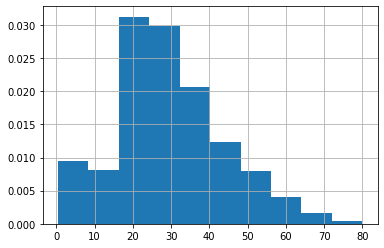

In [85]:
titanic['Age'].hist(density=True)

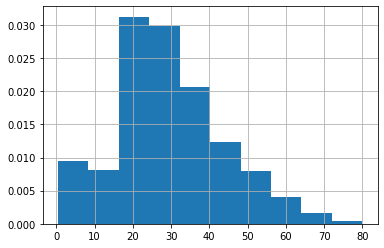

In [86]:
plt.hist(titanic['Age'].dropna().values, density=True)
plt.grid()

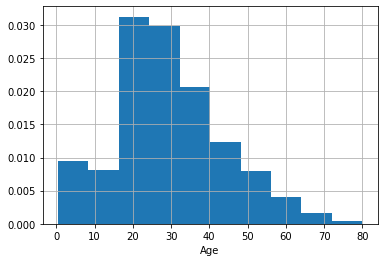

In [87]:
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

In [88]:
titanic['Age_coarse'].value_counts()

grown-up    592
child       113
senior        7
Name: Age_coarse, dtype: int64

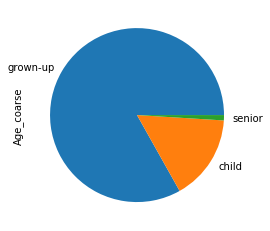

In [89]:
titanic['Age_coarse'].value_counts().plot(kind='pie')

In [90]:
coarse_age_series = titanic['Age_coarse'].cat.add_categories(['unknown'])
coarse_age_series

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): [child < grown-up < senior < unknown]

In [91]:
coarse_age_series.cat.categories

Index(['child', 'grown-up', 'senior', 'unknown'], dtype='object')

In [92]:
coarse_age_series = coarse_age_series.fillna('unknown')
coarse_age_series

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643     unknown
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): [child < grown-up < senior < unknown]

In [93]:
coarse_age_series.value_counts()

grown-up    592
unknown     177
child       113
senior        7
Name: Age_coarse, dtype: int64

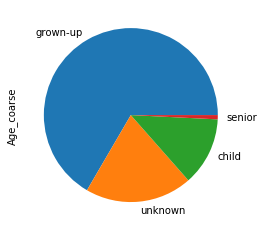

In [94]:
coarse_age_series.value_counts().plot(kind='pie')

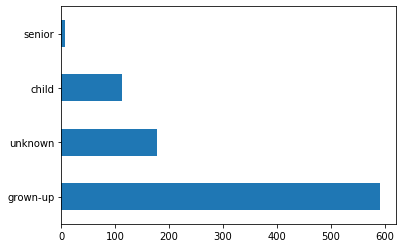

In [95]:
coarse_age_series.value_counts().plot(kind='barh')

The `plot` function also works on DataFrames.

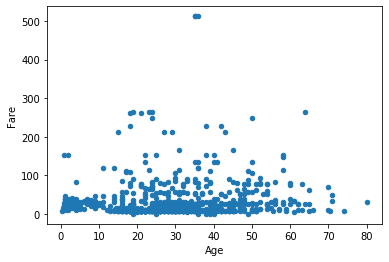

In [96]:
titanic[['Age', 'Fare']].plot(kind='scatter', x='Age', y='Fare')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

# Merging DataFrames
Merging is a concept that is often used in relational databases. It allows to combine multiple tables into one by joining the columns with respect to the values in a special key column. There are different options this can be achieved.
![](pictures/merging.png)
The `DataFrame.merge` function offers these functionalities borrowed from SQL (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas-dataframe-merge).

In [97]:
df1 = pd.DataFrame({'A': [1, 2, 3, 4],
                    'B': [0, np.pi, 2 * np.pi, 3 * np.pi],
                    'C': ['mouse', 'cat', 'dog', 'fish']})
df1

A         B      C
0  1  0.000000  mouse
1  2  3.141593    cat
2  3  6.283185    dog
3  4  9.424778   fish

In [98]:
df2 = pd.DataFrame({'C': ['mouse', 'horse', 'lizard', 'fish'],
                    'D': [1.0, 1.7, 3.0, 2.1],
                    'E': [1, np.e, np.e ** 2, np.e ** 3]})
df2

C    D          E
0   mouse  1.0   1.000000
1   horse  1.7   2.718282
2  lizard  3.0   7.389056
3    fish  2.1  20.085537

## Inner Join
The inner join will take the intersection of the keys.

In [99]:
df1.merge(df2, how='inner')

A         B      C    D          E
0  1  0.000000  mouse  1.0   1.000000
1  4  9.424778   fish  2.1  20.085537

## Left Outer Join
The left outer join will keep all values from the left table (the one on which merge is called) and use `NaN` where the right table is missing the respective rows.

In [100]:
df1.merge(df2, how='left')

A         B      C    D          E
0  1  0.000000  mouse  1.0   1.000000
1  2  3.141593    cat  NaN        NaN
2  3  6.283185    dog  NaN        NaN
3  4  9.424778   fish  2.1  20.085537

## Right Outer Join
The right outer join works just like the left outer join but instead of using all keys from the left table, it uses all keys from the right one.

In [101]:
df1.merge(df2, how='right')

A         B       C    D          E
0  1.0  0.000000   mouse  1.0   1.000000
1  4.0  9.424778    fish  2.1  20.085537
2  NaN       NaN   horse  1.7   2.718282
3  NaN       NaN  lizard  3.0   7.389056

## Outer Join
The outer join uses all keys that are present in both the left and the right table. Missing rows in either of the tables are filled with `NaN`.

In [102]:
df1.merge(df2, how='outer')

A         B       C    D          E
0  1.0  0.000000   mouse  1.0   1.000000
1  2.0  3.141593     cat  NaN        NaN
2  3.0  6.283185     dog  NaN        NaN
3  4.0  9.424778    fish  2.1  20.085537
4  NaN       NaN   horse  1.7   2.718282
5  NaN       NaN  lizard  3.0   7.389056

## Overlapping column names

In [103]:
df2 = df2.rename(columns={'D': 'A'})
df2

C    A          E
0   mouse  1.0   1.000000
1   horse  1.7   2.718282
2  lizard  3.0   7.389056
3    fish  2.1  20.085537

In [104]:
df1

A         B      C
0  1  0.000000  mouse
1  2  3.141593    cat
2  3  6.283185    dog
3  4  9.424778   fish

If it is not implicitly clear on which column the join should occur, we have to tell Pandas which column to use. It can also perform the join on multiple columns but therefore the dtypes of the matched columns inside the two DataFrames must be equal.

In [105]:
df1.merge(df2, how='inner')

/home/philipp/conda/envs/scientific_programming/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


A    B      C    E
0  1  0.0  mouse  1.0

We can explicitly tell Pandas on which column the join should occur using the keyword argument `on`. The `suffixes` parameter allows us to control how overlapping column names should be changed in the joined DataFrame.

In [106]:
df1.merge(df2, how='inner', on='C', suffixes=('_from_df1', '_from_df2'))

A_from_df1         B      C  A_from_df2          E
0           1  0.000000  mouse         1.0   1.000000
1           4  9.424778   fish         2.1  20.085537

In [107]:
df1['A'] = df1['A'].astype(float)
df1.merge(df2, how='inner', on=['A', 'C'])

A    B      C    E
0  1.0  0.0  mouse  1.0

# Working with timeseries data
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html  
The most fundamental building block of timeseries data in pandas is the `Timestamp`. It represents a moment in time to the precision of a nanosecond. It is complemented by `Timedelta`, which represents a stretch of time such as "one month", without being fixed to any date and `Period`, which is a combination of the two such as "June 2018". Yet `Period` needs to have a certain regularity, such as every month.


## Timestamps
Timestamps can be easily created from human readable strings using `pd.datetime`.

In [108]:
pd.to_datetime('2020-06-09')

Timestamp('2020-06-09 00:00:00')

In [109]:
pd.to_datetime('9th June 20')

Timestamp('2020-06-09 00:00:00')

In [110]:
pd.to_datetime('06.09.2020')

Timestamp('2020-06-09 00:00:00')

For non-Americans and people who think that the day should come before the month.

In [111]:
pd.to_datetime('09.06.2020', dayfirst=True)

Timestamp('2020-06-09 00:00:00')

In [112]:
pd.to_datetime('2020-06-09 14:45')

Timestamp('2020-06-09 14:45:00')

In [113]:
date = pd.to_datetime('2020-06-09 14:45:30.600700800')
date

Timestamp('2020-06-09 14:45:30.600700800')

`Timestamps` make all information available via attributes.

In [114]:
date.year

2020

In [115]:
date.month

6

In [116]:
date.day

9

In [117]:
date.second

30

In [118]:
date.microsecond

600700

In [119]:
date.nanosecond

800

Timestamps can be compared:

In [120]:
date1 = pd.to_datetime('2020-06-09 14:45')
date2 = pd.to_datetime('2020-06-09 14:46')
date1 < date2

True

When passed a Series, `to_datetime` returns a Series (with the same index), while a list-like is converted to a DatetimeIndex:

In [121]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [122]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

`Timestamps` can be formatted using a special set of symbols. All of them can be found here https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [123]:
date.strftime('Today is a %A in %B')

'Today is a Tuesday in June'

In [124]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

### DatetimeIndex

Timestamps can be used to index data.

In [125]:
index = pd.DatetimeIndex(['2020-06-16', '2020-06-23',
                          '2020-06-30', '2020-07-07',
                          '2020-07-14'])
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
2020-07-07                Creating Experiments
2020-07-14            Performance Optimization
dtype: object

In [126]:
schedule['2020-06-10':'2020-06-30']

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
dtype: object

Just like there's NaN for numbers, there's NaT (Not-A-Time) for timestamps:

In [127]:
dt = pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')
dt

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

`isnull()` checks for missing dates in DatetimeIndex-objects (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike):

In [128]:
dt.isnull()

array([False,  True])

## Reading timeseries data

In [129]:
!head data/ao_monthly.txt

 1950    1  -0.60310E-01
 1950    2   0.62681E+00
 1950    3  -0.81275E-02
 1950    4   0.55510E+00
 1950    5   0.71577E-01
 1950    6   0.53857E+00
 1950    7  -0.80248E+00
 1950    8  -0.85101E+00
 1950    9   0.35797E+00
 1950   10  -0.37890E+00


Read the data which is in the fixed-width formatted lines format.

In [130]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0)
ts.head()

1         2
0                
1950  1 -0.060310
1950  2  0.626810
1950  3 -0.008128
1950  4  0.555100
1950  5  0.071577

This creates an integer index instead of the desired `DateTimeIndex`.

In [131]:
ts.index

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name=0, length=798)

In [132]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0,
                 parse_dates=[[0, 1]], infer_datetime_format=True)
ts.head()

2
0_1                 
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577

In [133]:
ts.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01'],
              dtype='datetime64[ns]', name='0_1', length=798, freq=None)

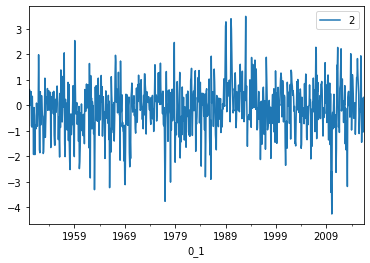

In [134]:
ts.plot();

Now that our series is indexed by timestamps, we can aggregate using time related semantics.

In [135]:
ts.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='0_1', length=798)

In [136]:
ts.groupby(ts.index.year).mean().head()

2
0_1           
1950 -0.199501
1951 -0.364626
1952 -0.674990
1953 -0.016515
1954 -0.000770

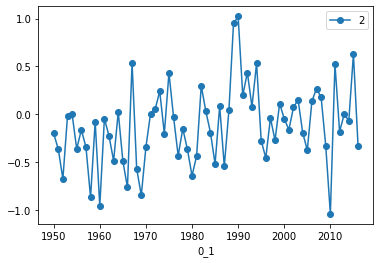

In [137]:
ts.groupby(ts.index.year).mean().plot(marker='o');

Using `pd.Grouper` we can specify more complex groupings.

In [138]:
ts.groupby(pd.Grouper(freq='5Y')).mean().head()

2
0_1                 
1950-12-31 -0.199501
1955-12-31 -0.283744
1960-12-31 -0.481644
1965-12-31 -0.243986
1970-12-31 -0.397825

In [139]:
ts.groupby(pd.Grouper(freq='d')).mean().head()

2
0_1                
1950-01-01 -0.06031
1950-01-02      NaN
1950-01-03      NaN
1950-01-04      NaN
1950-01-05      NaN

### Resampling
If you do not like the frequency at which your data is sampled you can change the sampling frequency.

In [140]:
nineteenfifty = ts['1950']
nineteenfifty.head()

2
0_1                 
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577

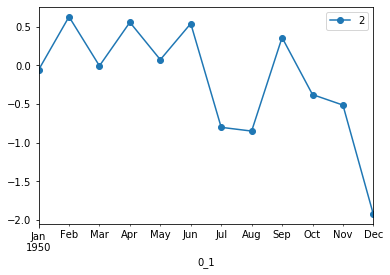

In [141]:
nineteenfifty.plot(marker='o');

In [142]:
nineteenfifty.asfreq('12D', method='ffill').head()

2
0_1                
1950-01-01 -0.06031
1950-01-13 -0.06031
1950-01-25 -0.06031
1950-02-06  0.62681
1950-02-18  0.62681

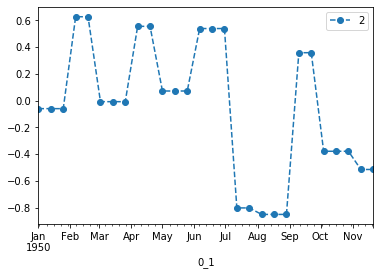

In [143]:
nineteenfifty.asfreq('12D', method='ffill').plot(style='--o');

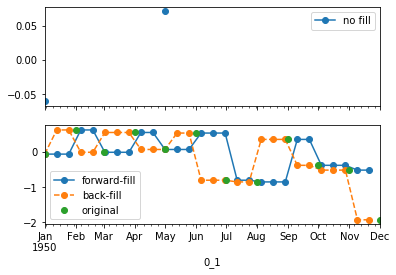

In [144]:
fig, ax = plt.subplots(nrows=2, sharex=True)

# row 1
nineteenfifty.asfreq('12D').plot(ax=ax[0], style='-o') # no fill
# row 2
nineteenfifty.asfreq('12D', method='ffill').plot(ax=ax[1], marker='o') # forward-fill
nineteenfifty.asfreq('12D', method='bfill').plot(ax=ax[1], style='--o') # back-fill
nineteenfifty.plot(ax=ax[1], style='o') # original

ax[0].legend(['no fill'])
ax[1].legend(['forward-fill', 'back-fill', 'original']);

Downsampling can be done by specifying a smaller frequency.

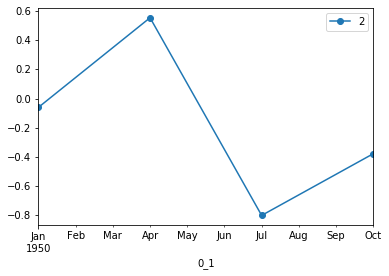

In [145]:
nineteenfifty.asfreq('3M', method='ffill').plot(marker='o');

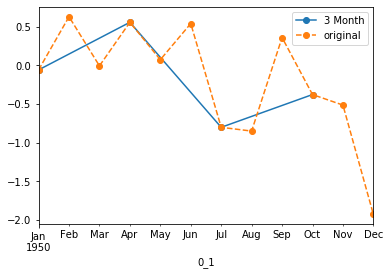

In [146]:
fig, ax = plt.subplots()

nineteenfifty.asfreq('3M', method='ffill').plot(marker='o', ax=ax) # downsampled
nineteenfifty.plot(ax=ax, style='--o') # original

ax.legend(['3 Month', 'original']);

Resampling can also be combined with aggregation using `resample`.
Let's look at some stock data to illustrate this.

In [147]:
yahoo = pd.read_csv('data/yahoo_stock.csv', index_col=0, parse_dates=True)
yahoo.head()

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2009-01-02  12.17  12.85  12.12  12.85      12.85   9514600
2009-01-05  12.72  13.01  12.39  12.86      12.86  11989900
2009-01-06  12.96  13.24  12.88  13.00      13.00  10056000
2009-01-07  12.71  13.16  12.45  12.71      12.71  24995900
2009-01-08  12.37  13.07  12.31  13.07      13.07  14355000

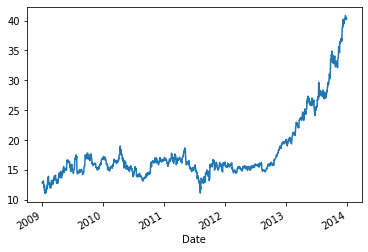

In [148]:
ts = yahoo['Close']
ts.plot();

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

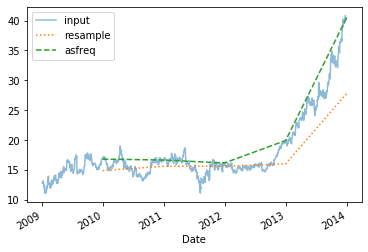

In [149]:
ts.plot(alpha=0.5, style='-')
ts.resample('BA').mean().plot(style=':')
ts.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

### Shifting and Differencing

In [150]:
ts_resampled = ts.asfreq('D', method='ffill')

Shifting data in time can be done in two ways. `shift` actually moves the data. Creating missing values at the one end and losing data at the other. In contrast, `tshift` only shifts the time index of the data and not the data itself.

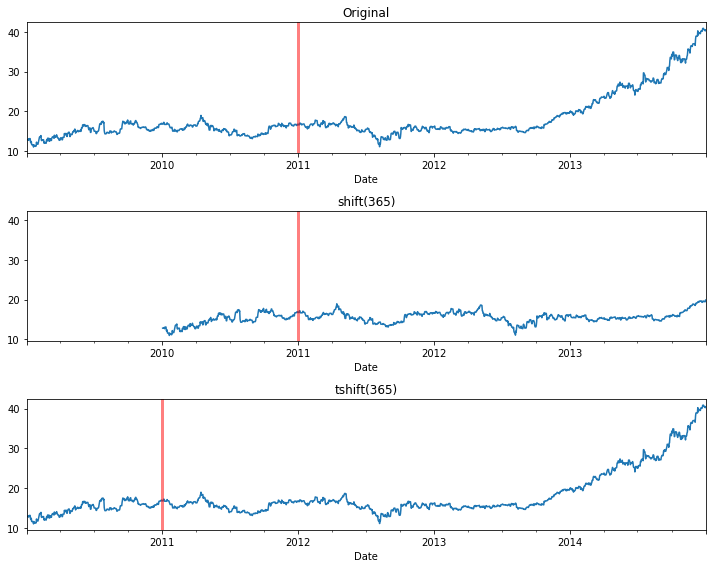

In [151]:
fig, axes = plt.subplots(nrows=3, sharey=True, figsize=(10, 8))

ts_resampled.plot(ax=axes[0], title='Original')
ts_resampled.shift(365).plot(ax=axes[1], title='shift(365)')
ts_resampled.tshift(365).plot(ax=axes[2], title='tshift(365)')

axes[0].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[1].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[2].axvline('2011', alpha=0.5, color='r', linewidth=3)

plt.tight_layout()

Shifting is useful for calculations that compare values across timesteps. An example is differencing to remove trend in the timeseries.

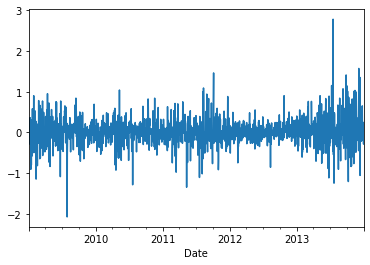

In [152]:
(ts_resampled - ts_resampled.shift(periods=1)).plot()

For differencing, pandas provides the convenient `diff` method.

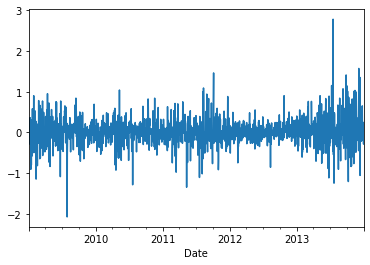

In [153]:
ts_resampled.diff(periods=1).plot()

## Window functions
Window functions are similar to `groupby` as they split data into different groups based on a changing window. The points in each window are aggregated using a summary statistic and then combined back into a timeseries.

### Rolling window
A rolling window is the standard example of a window function. It moves a window of fixed size across the timeseries.

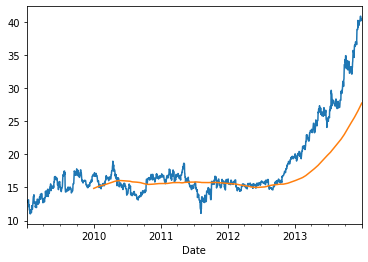

In [154]:
ts_resampled.plot()
ts_resampled.rolling(365).mean().plot()

Setting `center=True` the point that is aggregated and put into the new series will be from the middle of the window and not from its end. 

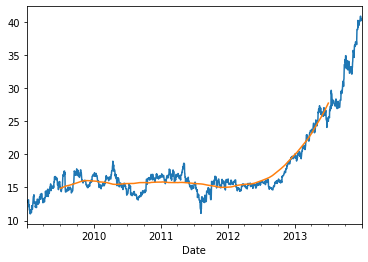

In [155]:
ts_resampled.plot()
ts_resampled.rolling(365, center=True).mean().plot()

### Expanding windows
An expanding window only has a minimal size. Then it grows bigger with each step, taking all previous values into account. This is useful if your timeseries measures a stationary value that only fluctuates around a mean.

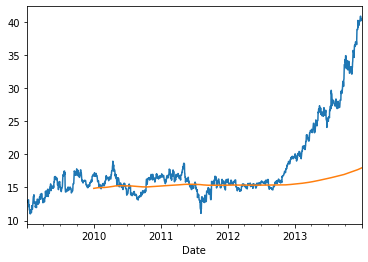

In [156]:
ts_resampled.plot()
ts_resampled.expanding(min_periods=365).mean().plot()

### Exponential weighted windows
An exponential weighted window works like an expanding window, but gives more recent datapoints an exponentially higher weighting in all calculations. Thus it can be viewed as a smooth version of a rolling window.

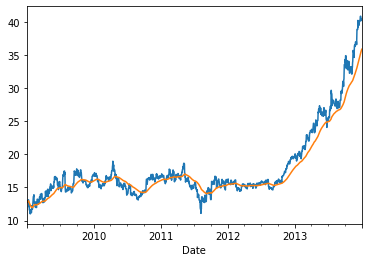

In [157]:
ts_resampled.plot()
ts_resampled.ewm(com=50.5, min_periods=5).mean().plot()

## Timedeltas and Periods

Timedeltas can be added to Timestamps

In [158]:
delta = pd.to_timedelta('1 day')
delta

Timedelta('1 days 00:00:00')

In [159]:
schedule

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
2020-07-07                Creating Experiments
2020-07-14            Performance Optimization
dtype: object

In [160]:
schedule.index += delta
schedule

2020-06-17           Statistical Visualization
2020-06-24    SciPy and Statistical Modeling I
2020-07-01             Statistical Modeling II
2020-07-08                Creating Experiments
2020-07-15            Performance Optimization
Freq: W-WED, dtype: object

In [161]:
pd.to_datetime('2019-08-15') - pd.to_datetime('2018-06-04')

Timedelta('437 days 00:00:00')

In [162]:
schedule.index += (pd.to_datetime('2019-08-15') - pd.to_datetime('2018-06-05'))
schedule.index = schedule.index.date
schedule

2021-08-27           Statistical Visualization
2021-09-03    SciPy and Statistical Modeling I
2021-09-10             Statistical Modeling II
2021-09-17                Creating Experiments
2021-09-24            Performance Optimization
dtype: object

The combination of Timestamps and Timedeltas allows for nice arithmetics with dates:

In [163]:
friday = pd.Timestamp('2018-01-05')
saturday = friday + pd.to_timedelta('1 day')
saturday, saturday > friday, saturday - friday

(Timestamp('2018-01-06 00:00:00'), True, Timedelta('1 days 00:00:00'))

There are even Businessdays in Pandas (Friday --> Monday)

In [164]:
friday = pd.Timestamp('2018-01-05')
monday = friday + pd.offsets.BDay()
monday

Timestamp('2018-01-08 00:00:00')

### date_range

In [165]:
index = pd.DatetimeIndex(['2020-06-16', '2020-06-23',
                          '2020-06-30', '2020-07-07',
                          '2020-07-14'])
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
2020-07-07                Creating Experiments
2020-07-14            Performance Optimization
dtype: object

A more convenient way to create such an index is to use `date_range`.  
`periods` specifies how many entries we want, alternatively we could set an explicit `stop`. `freq` specifies how the entries are spaced. The full list of possible offsets can be found here http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases. Thus the syntax is very similar to `range(start, stop, step)`

In [166]:
index = pd.date_range('2018-06-04', periods=5, freq='W')
index

DatetimeIndex(['2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01',
               '2018-07-08'],
              dtype='datetime64[ns]', freq='W-SUN')

Note that `freq='W'` does not mean a simple weekly frequency, but rather `the end of the week for all these dates`.

In [167]:
index = pd.date_range('2018-06-04', periods=5, freq='7D')
index

DatetimeIndex(['2018-06-04', '2018-06-11', '2018-06-18', '2018-06-25',
               '2018-07-02'],
              dtype='datetime64[ns]', freq='7D')

Pandas is smart at inferring frequencies:

In [168]:
tmp = pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')
tmp

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq='2D')

In [169]:
ts = pd.Series(range(len(tmp)), index=tmp)
ts

2018-01-01    0
2018-01-03    1
2018-01-05    2
Freq: 2D, dtype: int64

In [170]:
ts.resample('D').sum().index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

Alternatively we could use a `Period` index to signal that a topic belongs to an entire week.

In [171]:
prd = pd.Period('2018-06-04', '7D')
prd

Period('2018-06-04', '7D')

In [172]:
prd.freq

<7 * Days>

In [173]:
index = pd.period_range('2018-06-04', periods=5, freq='W')
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2018-06-04/2018-06-10           Statistical Visualization
2018-06-11/2018-06-17    SciPy and Statistical Modeling I
2018-06-18/2018-06-24             Statistical Modeling II
2018-06-25/2018-07-01                Creating Experiments
2018-07-02/2018-07-08            Performance Optimization
Freq: W-SUN, dtype: object

You can easily convert between `Timestamp` and period.

In [174]:
schedule = schedule.to_timestamp()
schedule

2018-06-04           Statistical Visualization
2018-06-11    SciPy and Statistical Modeling I
2018-06-18             Statistical Modeling II
2018-06-25                Creating Experiments
2018-07-02            Performance Optimization
Freq: W-MON, dtype: object

In [175]:
schedule.to_period(freq='W')

2018-06-04/2018-06-10           Statistical Visualization
2018-06-11/2018-06-17    SciPy and Statistical Modeling I
2018-06-18/2018-06-24             Statistical Modeling II
2018-06-25/2018-07-01                Creating Experiments
2018-07-02/2018-07-08            Performance Optimization
Freq: W-SUN, dtype: object

In [176]:
prd

Period('2018-06-04', '7D')

In [177]:
prd.to_timestamp().to_period(freq='2D')

Period('2018-06-04', '2D')

### Insertion: Accessing values in Series

In [178]:
idx = pd.period_range('2000', periods=4)
idx

PeriodIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='period[D]', freq='D')

For Series and Indexes backed by normal NumPy arrays, Series.array will return a new arrays.PandasArray, which is a thin (no-copy) wrapper around a numpy.ndarray. PandasArray isn’t especially useful on its own, but it does provide the same interface as any extension array defined in pandas or by a third-party library.

In [179]:
idx.array

<PeriodArray>
['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04']
Length: 4, dtype: period[D]

In [180]:
pd.Series([1, 2, 3]).array

<PandasArray>
[1, 2, 3]
Length: 3, dtype: int64

In [181]:
idx.to_numpy()

array([Period('2000-01-01', 'D'), Period('2000-01-02', 'D'),
       Period('2000-01-03', 'D'), Period('2000-01-04', 'D')], dtype=object)

In [182]:
type(idx.to_numpy()[0])

pandas._libs.tslibs.period.Period

First info regarding anything to do with timeseries: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Further:  
A complete time series analysis tutorial. It includes handling time zones plus basic time series prediction and classification.

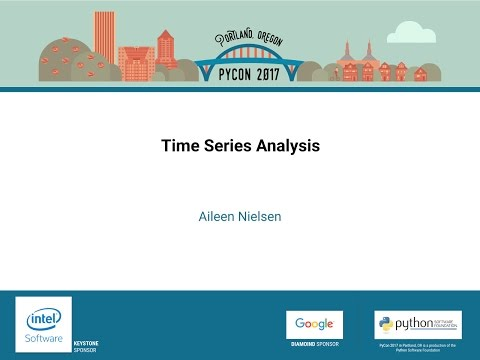

In [183]:
from IPython.display import YouTubeVideo
YouTubeVideo('zmfe2RaX-14')

# Exploratory data analysis

Exploratory data analysis (EDA) describes the process of building up an intuition for our data. It is achieved through a combination of data transformations and visualizations. Typical steps in the process of EDA are:


1. Research the fields of the dataset 
2. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data 
5. Explore each individual variable in the dataset 
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

EDA is very important as we cannot judge whether our modeling makes sense if we don't have intuition for our data. While every analysis starts with EDA you will always return to it when you get new results from modeling.

Here we present pivot tables as an easy way to explore the relationships between variables.

## Pivot for analysis 
Last time we introduced pivot tables as a way to restructure untidy data. However, the original are an operation to create tabular summaries of data. They can be used as a convenient shortcut for a two dimensional groupby.

Let's look at a normal groupby first:

In [184]:
titanic.groupby('Sex').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   430.932692  0.740385  2.166667  27.745174  0.698718  0.653846   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.252124  
male    25.523893



Let's say we want to analyze the the influnence of gender and passenger class on survial in the titanic dataset.

In [185]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Resetting the index makes it look a little nicer.

In [186]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

Sex  Pclass  Survived
0  female       1  0.967391
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

For people being used to the tidy format, this can be read intuitively. However, you might still prefer to have the second variable in the column headers. This is what is called a "pivot table".

In [187]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass         1         2         3
Sex                                 
female  0.967391  0.921053  0.500000
male    0.368852  0.157407  0.135447

For doing exactly this, pandas provides a shortcut.

In [188]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
female  0.967391  0.921053  0.500000
male    0.368852  0.157407  0.135447

Pivot tables can also include the margins, i.e. the values aggregated over rows and columns.

In [189]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', margins=True)

Pclass         1         2         3       All
Sex                                           
female  0.967391  0.921053  0.500000  0.740385
male    0.368852  0.157407  0.135447  0.188908
All     0.626168  0.472826  0.242363  0.382452

By default `pivot_table` will aggregate using the mean, but we can also choose all the functions available in `groupby` or use our own ones.

In [190]:
titanic.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc=[min, max])

min                   max             
Pclass        1     2     3         1     2      3
Sex                                               
female  25.9292  10.5  6.75  512.3292  65.0  69.55
male     0.0000   0.0  0.00  512.3292  73.5  69.55

Combining more than two variables is equally possible by stacking them in either the rows or the columns.

In [191]:
titanic.pivot_table(values='Fare', index=['Sex', 'EmbarkedLong'], columns='Pclass',
                   aggfunc='mean')

Pclass                        1          2          3
Sex    EmbarkedLong                                  
female Cherbourg     115.640309  25.268457  14.694926
       Queenstown     90.000000  12.350000  10.307833
       Southampton    99.026910  21.912687  18.670077
male   Cherbourg      93.536707  25.421250   9.352237
       Queenstown     90.000000  12.350000  11.924251
       Southampton    52.949947  19.232474  13.307149

In [192]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])
titanic['Age_coarse']

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (3, object): [child < grown-up < senior]

The tool [`pivottablejs`](https://github.com/nicolaskruchten/pivottable) allows you qickly explore data with pivotables using drag'n'drop. When using such a graphical tool you should make sure that you turn the interesting things into code so they don't get lost after closing the notebook.

In [193]:
from pivottablejs import pivot_ui
pivot_ui(titanic)

## Profiling
When doing exploratory data analysis, a lot of tasks have to be done every time so they can be automated. Tools like `pandas_profiling` can create summeries that give insights into many standard questions you can ask to a dataset. However, with abstraction comes less flexibility so tools like this will always only do part of your work and might at times not at all do what you want.

In [194]:
from pandas_profiling import ProfileReport
ProfileReport(titanic)

The following tutorial talks more about tools and processes in exploratory data analysis.

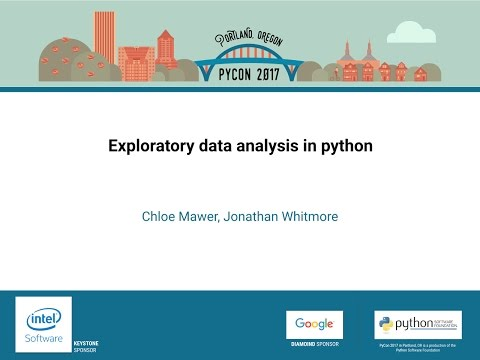

In [195]:
from IPython.display import YouTubeVideo
YouTubeVideo('W5WE9Db2RLU')